In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
import spacy
nlp = spacy.load('en')

In [54]:
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [55]:
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [56]:
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [57]:
df2.head()

,article_link,headline,is_sarcastic
0,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...,1
1,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails why congress is falling...,0
2,https://www.huffingtonpost.com/entry/eat-your-...,eat your veggies: 9 deliciously different recipes,0
3,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar from getting t...,1
4,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close to using word 'strea...,1


In [58]:
df1.shape, df2.shape

((26709, 3), (28619, 3))

In [59]:
df = pd.concat([df1, df2])

In [60]:
df.shape

(55328, 3)

In [61]:
df = df.reset_index()

In [62]:
df.head(10)

,index,article_link,headline,is_sarcastic
0,0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [63]:
df = df.drop(['article_link', 'index'], axis = 1)

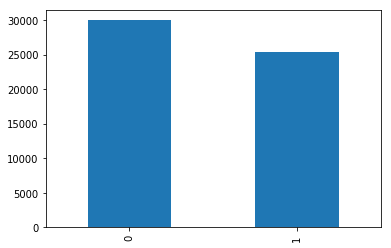

In [64]:
df['is_sarcastic'].value_counts().plot(kind = 'bar')

In [65]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [66]:
print(df['headline'][0])

former versace store clerk sues over secret 'black code' for minority shoppers


In [67]:
df['length'] = df['headline'].apply(lambda x : len(x.split(' ')))

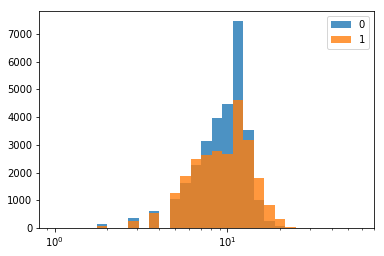

In [68]:
plt.xscale('log')
bins = 1.15**(np.arange(0,30))
plt.hist(df[df['is_sarcastic'] == 0]['length'], alpha = 0.8, bins = bins)
plt.hist(df[df['is_sarcastic'] == 1]['length'], alpha = 0.8, bins = bins)
plt.legend(('0', '1'))
plt.show()

# Some Text Analysis using Spacy

In [69]:
sw = list(nlp.Defaults.stop_words)
print(sw)

['give', 'yourselves', 'further', 'became', 'any', 'six', 'although', 'could', 'third', 'ever', 'a', 'anyhow', 'also', 'hereafter', "n't", 'ten', 'else', 'thereby', 'have', 'three', 'herself', 'then', 'his', '‘ve', 'toward', 'if', "'ll", 'twelve', 'last', 'during', 'fifty', 'not', 'been', 'something', 'he', 'besides', 'though', 'beforehand', 'each', '‘re', 'do', 'itself', 'them', 'formerly', 'via', 'part', 'thru', 'were', 'than', 'from', 'or', 'who', 'will', '’re', 'might', 'serious', 'call', 'since', 'hence', "'m", 'using', 'nothing', 'unless', 'why', 'go', 'please', 'side', 'therefore', 'whenever', 'only', 'due', 'sometime', 'may', 'through', '’d', 'whereafter', 'she', 'such', 'beside', 'the', 'seemed', 'does', 'becoming', 'whatever', 'mine', 'off', 'sixty', 'someone', 'her', 'otherwise', 'under', 'anything', 'former', 'eight', 'nor', 'whereas', 'across', 'full', 'as', 'already', 'in', 'per', 'nowhere', 'another', 'latter', 'whence', 'make', '’ll', 'bottom', 'show', 'by', 'seems', 'm

In [70]:
np.argmax(list(df['length']))

34011

In [71]:
s = df['headline'].iloc[34011]

In [72]:
doc = nlp(s)

In [73]:
print(doc.text)

hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet


In [74]:
print('---------------------------------------------------------------------')
print(f"{'Text':{25}} {'POS':{10}} {'TAG':{10}} {'LEMMA':{10}} {'EXPLAIN':{10}}")
print('---------------------------------------------------------------------')
for token in doc:
    print(f'{token.text:{15}} {token.pos_:{10}} {token.tag_:{10}} {token.lemma_:{10}} {spacy.explain(token.tag_):{10}}')

---------------------------------------------------------------------
Text                      POS        TAG        LEMMA      EXPLAIN   
---------------------------------------------------------------------
hot             ADJ        JJ         hot        adjective 
wheels          NOUN       NNS        wheel      noun, plural
ranked          VERB       VBD        rank       verb, past tense
number          NOUN       NN         number     noun, singular or mass
one             NUM        CD         one        cardinal number
toy             NOUN       NN         toy        noun, singular or mass
for             ADP        IN         for        conjunction, subordinating or preposition
rolling         VERB       VBG        roll       verb, gerund or present participle
down            PART       RP         down       adverb, particle
ramp            NOUN       NN         ramp       noun, singular or mass
,               PUNCT      ,          ,          punctuation mark, comma
knockin

In [75]:
doc1 = nlp(df['headline'][0])
options = {'distance': 120, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}
spacy.displacy.render(doc1, style='dep', options = options)

In [76]:
# Let's check if we any null string in the data
ar = []

for i, val in enumerate(list(df['headline'])):
    if(val == ''):
        ar.append(i)

print(ar)

[]


In [77]:
# So we don't have any strings which are null

In [78]:
doc3 = nlp(df['headline'][1])

In [79]:
ar = [token for token in doc3 if not token.is_punct | token.is_space]
ar

[the,
 roseanne,
 revival,
 catches,
 up,
 to,
 our,
 thorny,
 political,
 mood,
 for,
 better,
 and,
 worse]

In [80]:
ar1 = [token.lemma_ for token in doc3 if not token.is_punct | token.is_space | token.is_stop]
ar1

['roseanne', 'revival', 'catch', 'thorny', 'political', 'mood', 'well', 'bad']

In [81]:
' '.join(ar1)

'roseanne revival catch thorny political mood well bad'

In [82]:
def remove_punctuations(ar):
    result = []
    for i in tqdm(ar):
        tokens = [token.lemma_ for token in nlp(i) if not token.is_punct | token.is_space | token.is_stop]
        result.append(' '.join(tokens))
    return result

df['headline_pre'] = remove_punctuations(df['headline'])

100%|████████████████████████████████████████████████████████████████████████████| 55328/55328 [14:33<00:00, 63.37it/s]


In [83]:
df.head()

,headline,is_sarcastic,length,headline_pre
0,former versace store clerk sues over secret 'b...,0,12,versace store clerk sue secret black code mino...
1,the 'roseanne' revival catches up to our thorn...,0,14,roseanne revival catch thorny political mood w...
2,mom starting to fear son's web series closest ...,1,14,mom start fear son web series close thing gran...
3,"boehner just wants wife to listen, not come up...",1,13,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,11,j.k rowling wish snape happy birthday magical way


In [84]:
df.to_csv('final_data.csv', sep = ',', index = False)

In [3]:
data = pd.read_csv('final_data.csv')

In [4]:
data.head()

,headline,is_sarcastic,length,headline_pre
0,former versace store clerk sues over secret 'b...,0,12,versace store clerk sue secret black code mino...
1,the 'roseanne' revival catches up to our thorn...,0,14,roseanne revival catch thorny political mood w...
2,mom starting to fear son's web series closest ...,1,14,mom start fear son web series close thing gran...
3,"boehner just wants wife to listen, not come up...",1,13,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,11,j.k rowling wish snape happy birthday magical way


In [5]:
print(data['headline'][0])

former versace store clerk sues over secret 'black code' for minority shoppers


In [6]:
print(data['headline_pre'][0])

versace store clerk sue secret black code minority shopper


In [7]:
data.isnull().sum()

headline        0
is_sarcastic    0
length          0
headline_pre    6
dtype: int64

In [8]:
data = data.dropna()

In [9]:
X = data['headline_pre']
y = data['is_sarcastic']

In [17]:
pd.Series(y).value_counts()

0    29964
1    25358
Name: is_sarcastic, dtype: int64

# Let's Build our Machine Learning Model to Classify News Headlines

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [11]:
def metrices(actual, predicted):
    print('Confusion Matrix : ', confusion_matrix(actual, predicted))
    print('Classification Report : ', classification_report(actual, predicted))

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 42)

In [13]:
xtrain.shape, xtest.shape

((41491,), (13831,))

#### Multinomial Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

clf1 = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())])

clf1.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [62]:
clf1.score(xtrain, ytrain), clf1.score(xtest, ytest)

(0.8950856812320744, 0.8451305039404237)

In [64]:
metrices(ytest, clf1.predict(xtest))

Confusion Matrix :  [[6694  743]
 [1399 4995]]
Classification Report :                precision    recall  f1-score   support

           0       0.83      0.90      0.86      7437
           1       0.87      0.78      0.82      6394

    accuracy                           0.85     13831
   macro avg       0.85      0.84      0.84     13831
weighted avg       0.85      0.85      0.84     13831



#### Linear SVC

In [65]:
from sklearn.svm import LinearSVC

clf2 = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])

clf2.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [67]:
clf2.score(xtrain, ytrain), clf2.score(xtest, ytest)

(0.9591236653732135, 0.8893789313860169)

In [68]:
metrices(ytest, clf2.predict(xtest))

Confusion Matrix :  [[6718  719]
 [ 811 5583]]
Classification Report :                precision    recall  f1-score   support

           0       0.89      0.90      0.90      7437
           1       0.89      0.87      0.88      6394

    accuracy                           0.89     13831
   macro avg       0.89      0.89      0.89     13831
weighted avg       0.89      0.89      0.89     13831



#### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf3 = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', RandomForestClassifier(n_estimators = 200, random_state = 42))])

clf3.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [15]:
clf3.score(xtrain, ytrain), clf3.score(xtest, ytest)

(1.0, 0.9367363169691273)

In [16]:
metrices(ytest, clf3.predict(xtest))

Confusion Matrix :  [[7155  282]
 [ 593 5801]]
Classification Report :                precision    recall  f1-score   support

           0       0.92      0.96      0.94      7437
           1       0.95      0.91      0.93      6394

    accuracy                           0.94     13831
   macro avg       0.94      0.93      0.94     13831
weighted avg       0.94      0.94      0.94     13831



In [18]:
s = 'Cows lose their jobs as milk prices drop'

In [19]:
s

'Cows lose their jobs as milk prices drop'

In [20]:
tokens1 = [token.lemma_ for token in nlp(s) if not token.is_punct | token.is_space | token.is_stop]

In [21]:
a = ' '.join(tokens1)

In [22]:
ar1 = [a]
ar1

['cow lose job milk price drop']

In [23]:
pred = clf3.predict(ar1)

In [24]:
pred

array([1], dtype=int64)

In [25]:
import pickle

In [26]:
pickle.dump(clf3, open('model.pkl', 'wb'))

In [27]:
p = final_clf.predict(ar1)

NameError: name 'final_clf' is not defined

In [28]:
p[0]

NameError: name 'p' is not defined

In [29]:
import pickle

In [30]:
clfs = pickle.load(open('model.pkl', 'rb'))

In [31]:
clfs.predict(ar1)

array([1], dtype=int64)